


<img src="fig/errorSeguimiento.png" width=650>


En la Fig. se muestra un receptor simple para la banda de frecuencia media.

La frecuencia del oscilador, $f_o$, está controlada por un circuito de resonancia paralelo, así como el filtrado de RF después de la antena, que está sintonizado con la frecuencia portadora $f_{RF}$ entre $550 kHz$ y $1.550 MHz$.

El mezclador reduce a la frecuencia intermedia $f_{IF} = f_o-f_{RF} = 450 kHz$, por lo que la diferencia de frecuencia entre los dos circuitos de resonancia debe permanecer constante en la sintonización.

Los elementos de sintonia son dos condensadores idénticos, los $C_t$, que son ajustables de $6pF$ a $100pF$. Las frecuencias de resonancia de los circuitos sintonizados son funciones no lineales de las capacitancias, por lo que la frecuencia $IF$ exacta se puede obtener en dos frecuencias de entrada solamente. Se eligen para $f_{RFl} = 617kHz$ y $f_{RFu} = 1.483 MHz$.

    1. Encuentre los componentes $L_{rf}$, $C_{rf}$, $L_o$, $C_o$ y dibuje una curva que muestre la desviación de la frecuencia nominal de $FI$ de $450 kHz$, el llamado error de seguimiento.
    ¿Cuál es el error máximo?

    2. El error de $FI$ puede mejorarse sustancialmente utilizando un llamado condensador de relleno, $C_p$ en el circuito del oscilador como se muestra en la figura.

    3. Vuelva a calcular todos los componentes con $C_p = 118pF$, y dibuje una nueva curva de desviaciones de frecuencia. ¿Cuál es el nuevo máximo error de seguimiento?




# Resolucion

Se desea realizar un receptor de super-heterodino AM, 550 KHz a 1550 KHz.
Para escoger la estación que se desea recibir, se desea utilizar un capacitor en tanden. 

Sabemos que :

$(C_{RF}+ C_f) L_{RF} = \frac{1}{\omega^2} $ 

Para cubrir la banda de AM, la elección de la sintonia de RF se realiza con un capacitor variable que puede tomar los valores de 6 pF a 100 pF.  
La frecuencia mínima se logra con el valor mas grande de capacidad y la frecuencia maxima se logra con la capacidad mínima.

$(C_{RF}+ 100 pF) L_{RF} = \frac{1}{(2\pi 550KHz)^2} $ 

$(C_{RF}+ 6 pF) L_{RF} = \frac{1}{(2\pi 1550KHz)^2} $ 


    Crf= 7.540476190476192 pF
    Lrf= 778.6511495316073 uHy
    
La frecuencia del oscilador local se encuentra como $f_{OL} = f_{RF} + f_{FI}$

El valor de los componentes para el oscilador deben ser calculados para dos frecuencias de RF dadas, $f_a = $617KHz y $f_b=$1483 KHz. Por lo tanto, Las frecuencias del oscilador local donde se deben calcular los componentes son 1067KHz y 1933KHz.
Previamente es necesario conocer el valor del capacitor que sintoniza RF en esas frecuencias. 

$C_{fa}  = \frac{1}{(2\pi 617KHz)^2 L_{RF}} $ 

$C_{fb}  = \frac{1}{(2\pi 1483KHz)^2 L_{RF}} $     

    Cf =  7.791246321050216e-11 pF para 617KHz
    Cf =  7.251119660555231e-12 pF para 1483KHz
    
    Col= 23.71391588865013 pF
    Lol= 218.92984636370343 uHy

Ya tenemos los valores de los componentes, es momento de calcular el error de seguimiento.

Para ello, barremos el valor del capacitor Cf desde 6pF a 100pF, y calculamos el resultado de la mezcla para cada uno de los valores del capacitor.


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
import scipy.odr, scipy.special, scipy.stats 
import scipy.signal as signal
import sys

import matplotlib.pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (10, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

#Simple sintonizado, una etapa.


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [3]:
# Parametros
fi   = 450e3

Cfi = 100e-12
frfi = 550e3
wrfi = frfi *2*np.pi

Cfs = 6e-12
frfs = 1550e3
wrfs = frfs *2*np.pi


Crf = (wrfs**2*Cfs - wrfi**2*Cfi)/ (wrfi**2 - wrfs**2)
print('Crf=',Crf/1e-12, 'pF')

Lrf = 1/(wrfs**2*(Crf+6e-12))

print('Lrf=',Lrf/1e-6,'uHy')


Crf= 7.540476190476192 pF
Lrf= 778.6511495316073 uHy


La frecuencia del oscilador local se encuentra como $f_{OL} = f_{RF} + f_{FI}$

El valor de los componentes para el oscilador deben ser calculados para dos frecuencias de RF dadas, $f_a = $617KHz y $f_b=$1483 KHz. Por lo tanto, Las frecuencias del oscilador local donde se deben calcular los componentes son 1067KHz y 1933KHz.
Previamente es necesario conocer el valor del capacitor que sintoniza RF en esas frecuencias. 

$C_{fa}  = \frac{1}{(2\pi 617KHz)^2 L_{RF}} $ 

$C_{fb}  = \frac{1}{(2\pi 1483KHz)^2 L_{RF}} $ 


In [4]:
def Cf(f,L):
    return  1/(L*(2*np.pi*f)**2)

frfa = 617e3
fola = frfa + fi
wola = fola *2*np.pi

frfb = 1483e3
folb = frfb + fi
wolb = folb *2*np.pi


Cfa = Cf(frfa, Lrf) - Crf
Cfb = Cf(frfb, Lrf) - Crf

print('Cf = ',Cfa,'pF para 617KHz')
print('Cf = ',Cfb,'pF para 1483KHz')

Cf =  7.791246321050216e-11 pF para 617KHz
Cf =  7.251119660555231e-12 pF para 1483KHz


In [5]:
Col = (wolb**2*Cfb - wola**2*Cfa)/ (wola**2 - wolb**2)
print('Col=',Col/1e-12, 'pF')

Lol = 1/(wolb**2*(Col+Cfb))

print('Lol=',Lol/1e-6,'uHy')


Col= 23.71391588865013 pF
Lol= 218.92984636370343 uHy


Ya tenemos los valores de los componentes, es momento de calcular el error de seguimiento. 

Para ello, barremos el valor del capacitor Cf desde 6pF a 100pF, y calculamos el resultado de la mezcla para cada uno de los valores del capacitor. 


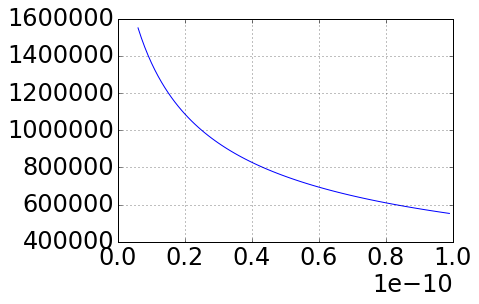

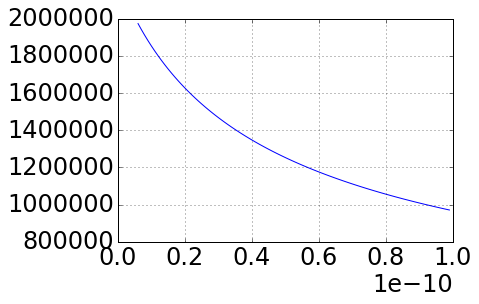

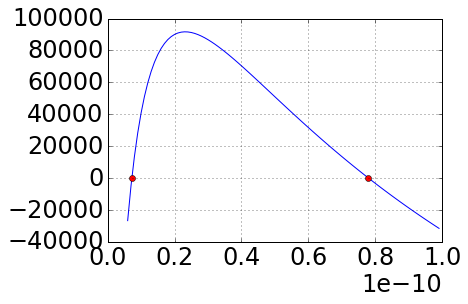

In [6]:
# Variando Sintonia

# Calculo de la sintonia 
def getFo(C,L):
    fo = (1/(L*C)**0.5)/(2*np.pi)
    return fo

def FreqResult(Cr, Lr, Co, Lo):
    frf = getFo(Cr,Lr)
    fol = getFo(Co,Lo)
    return (fol-frf)

def errorSeg(Cr,Lr,Co,Lo, fi):
    return (FreqResult(Cr,Lr,Co,Lo) - fi)
    
Cf = np.arange(6e-12,100e-12,1e-12)    
    
plt.plot(Cf, [getFo(c+Crf,Lrf)  for c in Cf])
plt.grid()
plt.show()

plt.plot(Cf, [getFo(c+Col,Lol)  for c in Cf])
plt.grid()
plt.show()

plt.plot(Cf, [ errorSeg(Crf+c,Lrf,Col+c,Lol, fi) for c in Cf])
plt.plot(Cfa,  errorSeg(Crf+Cfa,Lrf,Col+Cfa,Lol, fi), 'ro' )
plt.plot(Cfb,  errorSeg(Crf+Cfb,Lrf,Col+Cfb,Lol, fi), 'ro' )
plt.grid()
plt.show()

In [7]:
def ES(Cpf):
    cv = Cpf*1e-12
    e = errorSeg(Crf+cv,Lrf,Col+cv,Lol, fi)
    print(e/450e3*100)

interact(ES, Cpf=(6,100,1) )

interactive(children=(IntSlider(value=53, description='Cpf', min=6), Output()), _dom_classes=('widget-interact',))

<function __main__.ES>

Dado que el error es muy grande,  es mayor al 20% (91KHz),  propone reducir el error utilizado un capacitor en serie con el capacitor de oscilador local. 


In [8]:
def Cserie(Ca, Cb ):
    return (Ca*Cb/(Ca+Cb))

Cfas = Cserie(Cfa, 118e-12)
Cfbs = Cserie(Cfb, 118e-12)
print('Cfas=', Cfas)
print('Cfbs=', Cfbs)

Cols = (wolb**2*Cfbs - wola**2*Cfas)/ (wola**2 - wolb**2)
print('Cols=',Cols/1e-12, 'pF')

Lols = 1/(wolb**2*(Cols+Cfbs))

print('Lols=',Lols/1e-6,'uHy')


Cfas= 4.692744151228872e-11
Cfbs= 6.831333103164087e-12
Cols= 10.739482280437105 pF
Lols= 385.8199137281432 uHy


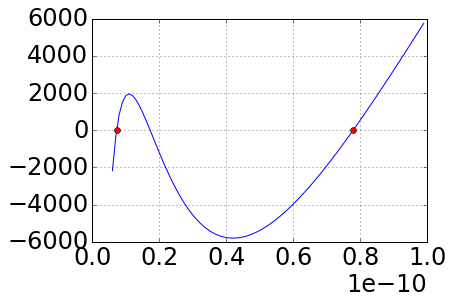

In [9]:
plt.plot(Cf, [ errorSeg(Crf+c,Lrf,Cols+Cserie(c,118e-12),Lols, fi) for c in Cf])
plt.plot(Cfa,  errorSeg(Crf+Cfa,Lrf,Cols+Cserie(Cfa,118e-12),Lols, fi), 'ro' )
plt.plot(Cfb,  errorSeg(Crf+Cfb,Lrf,Cols+Cserie(Cfb,118e-12),Lols, fi), 'ro' )
plt.grid()
plt.show()

In [10]:
def ES(Cpf):
    cv = Cpf*1e-12
    e = errorSeg(Crf+cv,Lrf,Cols+Cserie(cv,118e-12),Lols, fi)
    print(e/450e3*100)

interact(ES, Cpf=(6,100,1) )

interactive(children=(IntSlider(value=53, description='Cpf', min=6), Output()), _dom_classes=('widget-interact',))

<function __main__.ES>

Como podemos ver, el error se redujo, siendo ahora menor a 2%. 